---
"Лабораторна робота 2. Побудова лінійного бінарного класифікатора на основі оптимізації функціонала якості"
#__Розпізнавання образів та комп'ютерний зір__
---

**Мета**: реалізузвати бінарний класифікатор на основі оптимізації функціонала якості засобами мови Python

::: callout-note
## Примітка
Попередньо опрацювати матеріали **Лекції 1**.
:::

## Що ви будете вміти?
* Використовувати деякі можливості бібліотеки `NumPy`
* Реалізувати простий лінійний класифікатор на основі оптимізації функціонала якості засобами мови Python

## Короткі теоретичні відомості

### Бібліотека NumPy

[NumPy](https://numpy.org/), скорочено від Numerical Python, вже давно є наріжним каменем чисельних обчислень у Python. Він надає структури даних, алгоритми та бібліотечні зв'язки, необхідні для більшості наукових програм, що використовують числові дані у Python. NumPy містить, серед іншого:

* Швидкий та ефективний об'єкт багатовимірного масиву ndarray

* Функції для виконання поелементних обчислень з масивами або математичних операцій між масивами

* Інструменти для читання та запису наборів даних на основі масивів на диск

* Операції лінійної алгебри, перетворення Фур'є та генерування випадкових чисел

* Досконалий C API, що дозволяє розширенням Python та власному коду на C або C++ отримувати доступ до структур даних та обчислювальних засобів NumPy.

Окрім можливостей швидкої обробки масивів, які NumPy додає до Python, одним з основних застосувань NumPy в аналізі даних є використання його як контейнера для даних, що передаються між алгоритмами та бібліотеками. Для числових даних масиви NumPy є більш ефективними для зберігання та маніпулювання даними, ніж інші вбудовані структури даних Python. Крім того, бібліотеки, написані мовою нижчого рівня, наприклад, C або FORTRAN, можуть працювати з даними, що зберігаються в масиві NumPy, без копіювання даних в інше представлення пам'яті. Таким чином, багато інструментів чисельних обчислень для Python або вважають масиви NumPy основною структурою даних, або орієнтовані на сумісність з NumPy.

Для інсталяції пакету потрібно виконати таку команду с консолі:

`conda install numpy`

### Постановка задачі

Скористаємося квадратичною функціює втрат і тоді лля нашого випадку отримаємо:

$L_i(\omega) = (1 - M_i)^2 = (1 - \omega^T \cdot x_i \cdot y_i)^2.$

Тоді функціонал якості матиме вигляд:

$Q(a, X^l) = \sum_{l=1}^i (1 - \omega^T \cdot x_i \cdot y_i)^2 \rightarrow \min \limits_{\substack{\omega}}$


Маємо задачу одновимірної оптимізації:

$\frac{dQ(\omega)}{d \omega} = 0.$

Розв'язок (знайти самостійно) матимиме такий вигляд:

$\omega ^T = \sum_{i=1}^l x_i^T y_i \Big( \sum_{i=1}^l x_i x_i^T \Big )^{-1}.$

### Приклад реалізації на Python

Нижче наведено код, який реалізує розрахунок коефіцієнтів лінійного класифікатора на основі оцінки, вираз якої було виведено вище.

[ 0.05793234 -0.0346272   0.1912188 ]


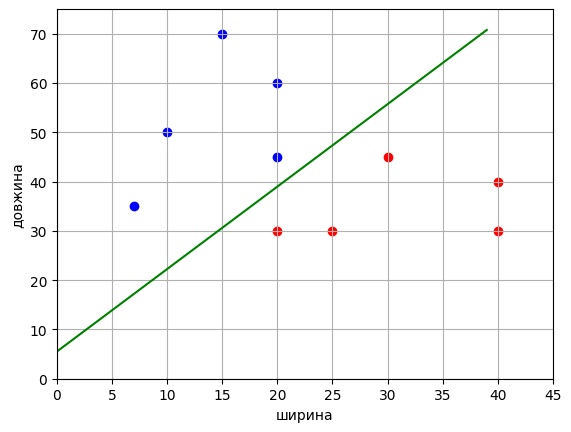

In [18]:
import numpy as np
import matplotlib.pyplot as plt


x_train = [[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]]
x_train = [x + [1] for x in x_train]  # Додаємо зміщення для кожного прикладу
x_train = np.array(x_train)
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)  # Обчислення підсумку
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)  # Обчислення підсумку зовнішнього добутку
w = np.dot(pt, np.linalg.inv(xxt))  # Обчислення вагових коефіцієнтів
print(w)

line_x = list(range(max(x_train[:, 0])))    # формування координат для лінії розділення
line_y = [-x*w[0]/w[1] - w[2]/w[1] for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для класу 1
x_1 = x_train[y_train == -1]                # і класу -1

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')  # відображення точок класу 1 червоним кольором
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')  # відображення точок класу -1 синім кольором
plt.plot(line_x, line_y, color='green')  # відображення лінії розділення зеленим кольором

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("довжина")
plt.xlabel("ширина")
plt.grid(True)
plt.show()

## Завдання для самостійної роботи 

1. Імпортувати дані для навчальної вибірки згідно з індивідуальним варіантом (імпорт організувати з файлу).
1. Побудувати бінарний МНК-класифікатор згідно з розглянутим вище прикладом і вивести результати бінарної класифікації на графіку.
1. Проаналізувати  отримані результати і порівняти їх з результатами, отриманими у лаб роб. 1.
1. Дати відповіді на контрольні запитання.
1. Відправити результати роботи у файлі lab_2_StudentLastName.ipynb до віддаленого репозиторію на GіtHub.

## Контрольні питання

1. Що таке відступ (margin) і яка його роль в побудові моделі класифікації?
    - Це ключове поняття, яке допомагає визначити, наскільки добре модель розділяє класи в навчальному наборі даних.
2. Яка роль функції втрат і чому не можна знайти коефіцієнти лінійного класифікатора шляхом безпосереднього розв'язаня задачі оптимізації через знаходження похідної?
    - Керування Навчанням: Функція втрат керує процесом оптимізації, надаючи зворотний зв'язок про те, наскільки добре модель працює. Чим менша втрата, тим краще здатність моделі узгоджувати свої прогнози з фактичними мітками.
    - Оцінка Моделі: Вона використовується для оцінки якості моделі під час тренування, допомагаючи виявити проблеми, такі як перенавчання (overfitting) або недонавчання (underfitting).
    - Градієнтний Спуск: У навчанні моделі часто використовується градієнтний спуск або подібні алгоритми для мінімізації функції втрат, де градієнти втрат визначають напрямок і величину кроків, які модель має виконати, щоб покращити свої прогнози.
3. Чим приницпово розрізняється алгоритм, розглянутий у цій роботі від алгоритму, розглянутого у лаб. роб 1?
   - Основна різниця між двома типами класифікаторів полягає у методах визначення оптимальних параметрів моделі. Простий лінійний бінарний класифікатор  застосовує прямі аналітичні методи або ітеративні підходи, тоді як більш складний лінійний бінарний класифікатор використовує методи оптимізації функціоналу якості для точного налаштування своїх параметрів.
5. Вивести математичний вираз для оцінки вектора $\omega$?
   
 

### Варіант індивідульного завдання №7

[-0.02469718 -0.04200629  1.98146409]


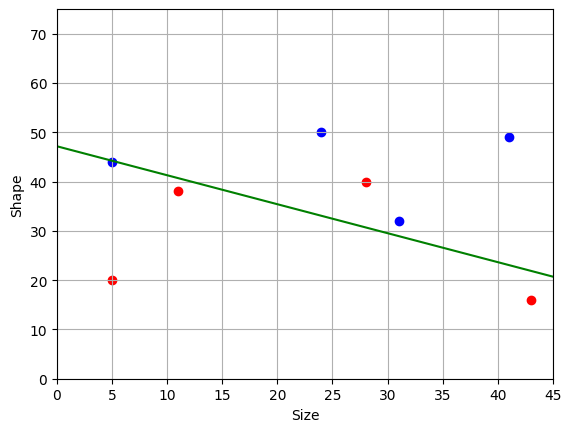

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Завантаження даних з файлу
data = pd.read_csv('../data.csv')
x_train = data[['Size', 'Shape']].values
y_train = data['Category'].values

# Додаємо зміщення для кожного прикладу
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])

pt = np.sum([x * y for x, y in zip(x_train, y_train)], axis=0)  # Обчислення підсумку
xxt = np.sum([np.outer(x, x) for x in x_train], axis=0)  # Обчислення підсумку зовнішнього добутку
w = np.dot(pt, np.linalg.inv(xxt))  # Обчислення вагових коефіцієнтів
print(w)

line_x = np.linspace(0, max(x_train[:, 0]), 100)  # Змінено для плавного лінії
line_y = [-x * w[0] / w[1] - w[2] / w[1] for x in line_x]

x_0 = x_train[y_train == 1]                 # формування точок для класу 1
x_1 = x_train[y_train == -1]                # і класу -1

plt.scatter(x_0[:, 0], x_0[:, 1], color='red')  # відображення точок класу 1 червоним кольором
plt.scatter(x_1[:, 0], x_1[:, 1], color='blue')  # відображення точок класу -1 синім кольором
plt.plot(line_x, line_y, color='green')  # відображення лінії розділення зеленим кольором

plt.xlim([0, 45])
plt.ylim([0, 75])
plt.ylabel("Shape")
plt.xlabel("Size")
plt.grid(True)
plt.show()


## References

1. [Машинное обучение. Вводная лекция. К.В. Воронцов, Школа анализа данных, Яндекс.](https://www.youtube.com/watch?v=SZkrxWhI5qM&list=PLJOzdkh8T5krxc4HsHbB8g8f0hu7973fK&index=2)
1. [#1. Что такое машинное обучение? Обучающая выборка и признаковое пространство | Машинное обучение](https://www.youtube.com/watch?v=Md8RW6tKCNg)
1. [NumPy](https://numpy.org)
1. [NumPy](https://wesmckinney.com/book/preliminaries)